# Keras-CNN-MNIST

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#import dataset
from tensorflow.keras.datasets import mnist # grayscale image

In [ ]:
(X_train,y_train),(X_test,y_test)= mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape
#60 000 images with 28x28 pixel each

(60000, 28, 28)

In [ ]:
single_image = X_train[0]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

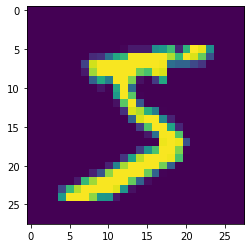

In [ ]:
plt.imshow(single_image)

In [ ]:
y_train 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#We have to one hot encoding this
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0] # 5 is now in the index number 5 with a 1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test,num_classes=10) #num_classes is optionnal

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
#time to normalize training data

In [ ]:
single_image.min()

0

In [ ]:
single_image.max()

255

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

In [ ]:
scaled_image = X_train[0]

In [ ]:
scaled_image.max()

1.0

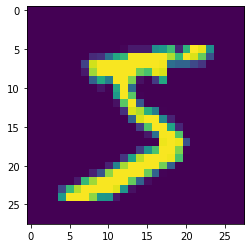

In [ ]:
#we normalise to have better result in our network
plt.imshow(scaled_image)

In [ ]:
X_train.shape

(60000, 28, 28)

We have to specify that we have a black & white image 
- batch_size,width,height,colors_channel

In [ ]:

X_train = X_train.reshape(60000,28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(10000,28,28,1)

## Creating and traning the model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

These are all hyperparameters based on your data. There is a correct value for them : 
- input_shape
- model.add(Flatten())
- output Dense layer

These are hyperparameters you can experiment with : 
- filter, kernelsize,
- Dense input activation 

In [ ]:
model = Sequential()

#filter is based on the input
#in general we choose power of 2 
#32 is a good step to start with
#SAME : apply padding only if needeed For stride 1, this will ensure that output image is same as input

#input_shape : single_image 28,28,1
#https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape=(28,28,1) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


#We need to flatten this image
#take a 28 by 28 and transform to an array of 784

model.add(Flatten())


model.add(Dense(128,activation='relu'))



#OUTPUT LAYER
#MULTICASS PROBLEM - SOFTMAW
model.add(Dense(10,activation='softmax'))


#keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2866 - accuracy: 0.9159 - val_loss: 0.0482 - val_accuracy: 0.9843
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0498 - accuracy: 0.9854 - val_loss: 0.0452 - val_accuracy: 0.9852
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0417 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0363 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0403 - val_accuracy: 0.9878


## Model Evaluation

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140471,0.957967,0.048174,0.9843
1,0.047606,0.985967,0.045190,0.9852
2,0.031396,0.990467,0.041739,0.9869
3,0.020784,0.993250,0.036278,0.9882
4,0.015367,0.995117,0.040280,0.9878


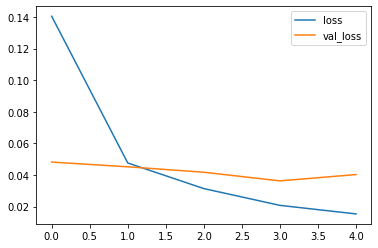

In [ ]:
metrics[['loss','val_loss']].plot()

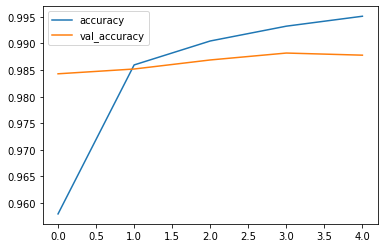

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.04028047248721123, 0.9878000020980835]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 978,    0,    0,    0,    0,    0,    0,    0,    1,    1],
       [   0, 1133,    0,    0,    0,    0,    1,    1,    0,    0],
       [   1,    4, 1015,    1,    0,    0,    0,    9,    2,    0],
       [   0,    0,    0,  998,    0,    5,    0,    4,    2,    1],
       [   0,    0,    1,    0,  976,    0,    0,    0,    0,    5],
       [   2,    0,    0,    5,    0,  884,    1,    0,    0,    0],
       [   6,    3,    0,    0,    3,    4,  941,    0,    1,    0],
       [   0,    1,    4,    0,    0,    0,    0, 1022,    0,    1],
       [   4,    1,    1,    3,    0,    4,    1,    3,  953,    4],
       [   2,    3,    1,    2,   14,    3,    0,    5,    1,  978]])

In [ ]:
import seaborn as sns

In [ ]:
#sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

### How to predict a single image

In [ ]:
my_number = X_test[0]

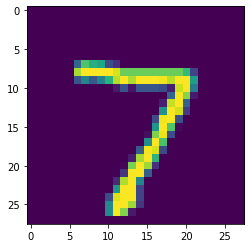

In [ ]:
plt.imshow(my_number.reshape(28,28))

In [ ]:
#batchsize : number of image, width, height, color_chanel
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7])